<a href="https://colab.research.google.com/github/PozzOver13/learning/blob/main/bayesian_modeling/20250108_bap_chapter_08_gaussian_processes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install preliz bambi


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 203.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 514.2/514.2 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.2/109.2 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 7.0 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1


In [2]:
import arviz as az
# import bambi as bmb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import preliz as pz
import pytensor.tensor as pt
from scipy.special import expit as logistic

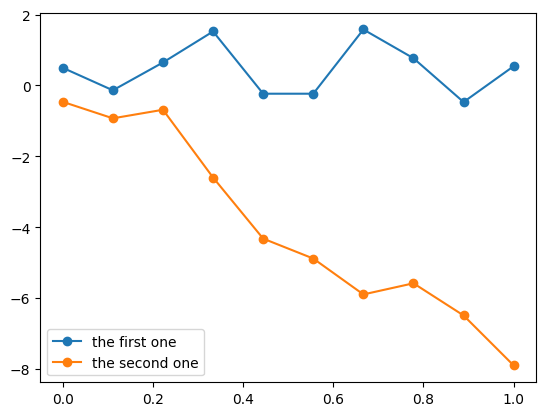

In [3]:
np.random.seed(42)
x = np.linspace(0, 1, 10)
y = np.random.normal(0, 1, len(x))
plt.plot(x, y, 'o-', label='the first one')
y = np.zeros_like(x)

for i in range(len(x)):
    y[i] = np.random.normal(y[i-1], 1)
plt.plot(x, y, 'o-', label='the second one')
plt.legend()

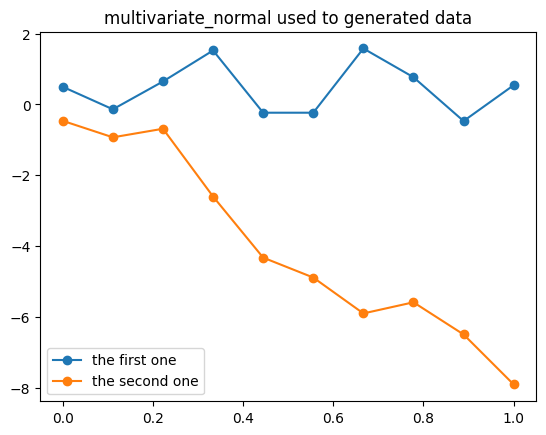

In [4]:
np.random.seed(42)
x = np.linspace(0, 1, 10)
y = np.random.multivariate_normal(np.zeros_like(x), np.eye(len(x)))
plt.plot(x, y, 'o-', label='the first one')
y = np.zeros_like(x)

for i in range(len(x)):
    y[i] = np.random.normal(y[i-1], 1)
plt.plot(x, y, 'o-', label='the second one')
plt.title('multivariate_normal used to generated data')
plt.legend()
plt.show()

In [5]:
np.zeros_like(x)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [6]:
# covariance matrix
np.eye(len(x))

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [7]:
def exp_quad_kernel(x, knots, ℓ=1):
    """exponentiated quadratic kernel"""
    return np.array([np.exp(-(x-k)**2 / (2*ℓ**2)) for k in knots])

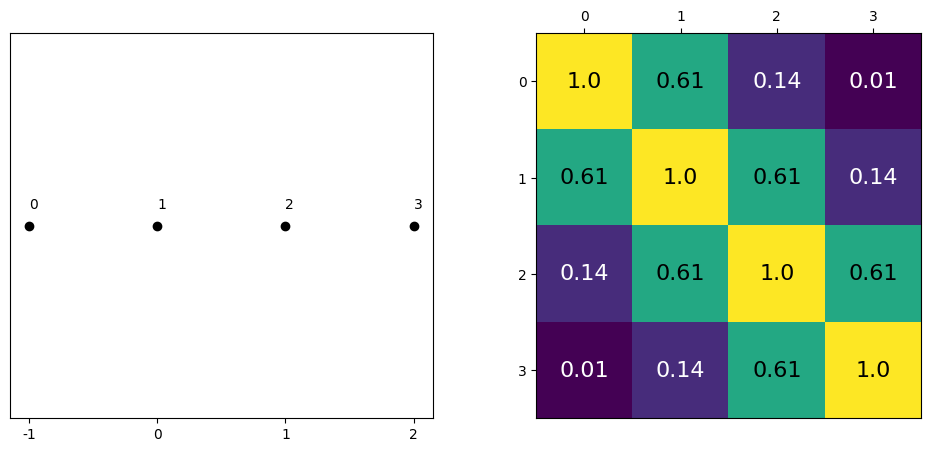

In [8]:
data = np.array([-1, 0, 1, 2])  # np.random.normal(size=4)
cov = exp_quad_kernel(data, data, 1)

_, ax = plt.subplots(1, 2, figsize=(12, 5))
ax = np.ravel(ax)

ax[0].plot(data, np.zeros_like(data), 'ko')
ax[0].set_yticks([])
for idx, i in enumerate(data):
    ax[0].text(i, 0+0.005, idx)
ax[0].set_xticks(data)
ax[0].set_xticklabels(np.round(data, 2))
#ax[0].set_xticklabels(np.round(data, 2), rotation=70)

ax[1].grid(False)
im = ax[1].imshow(cov)
colors = ['w', 'k']
for i in range(len(cov)):
    for j in range(len(cov)):
        ax[1].text(j, i, round(cov[i, j], 2),
                   color=colors[int(im.norm(cov[i, j]) > 0.5)],
                   ha='center', va='center', fontdict={'size': 16})
ax[1].set_xticks(range(len(data)))
ax[1].set_yticks(range(len(data)))
ax[1].xaxis.tick_top()

In [9]:
np.random.seed(24)
test_points = np.linspace(0, 10, 200)

In [10]:
len(test_points)

200

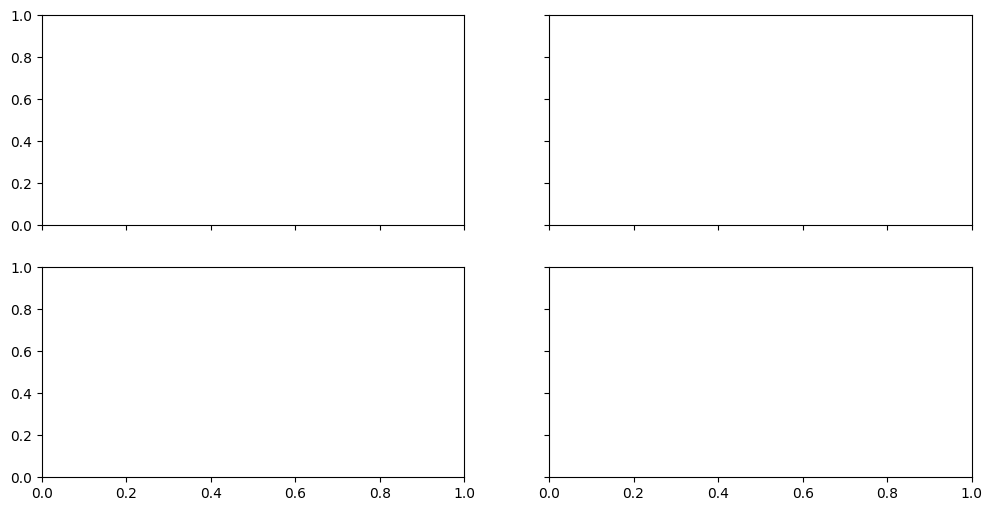

In [16]:
fig, ax = plt.subplots(2, 2, figsize=(12, 6), sharex=True, sharey=True)
ax = np.ravel(ax)

In [17]:
for idx, ℓ in enumerate((0.1, 1, 2, 10)):
    cov = exp_quad_kernel(test_points, test_points, ℓ)
    ax[idx].plot(test_points, pz.MvNormal(mu=np.zeros_like(test_points), cov=cov).rvs(2).T)
    ax[idx].set_title(f'ℓ ={ℓ}')
fig.text(0.51, -0.03, 'x', fontsize=16)
fig.text(-0.03, 0.5, 'f(x)', fontsize=16)

Text(-0.03, 0.5, 'f(x)')

In [19]:
# fig

# Gaussian Process regression

Text(0, 0.5, 'f(x)')

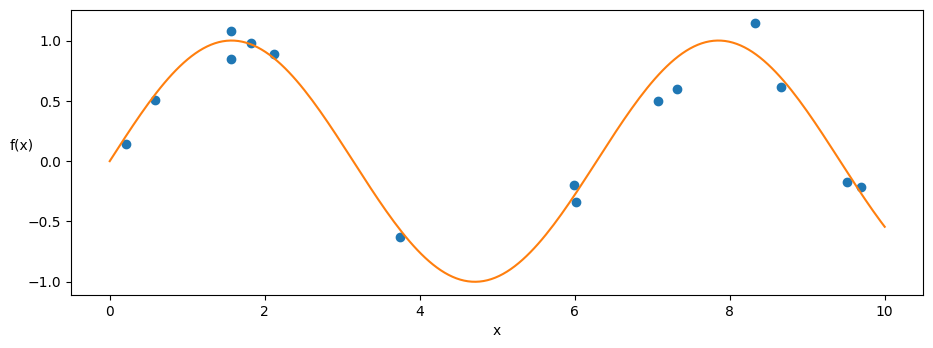

In [20]:
np.random.seed(42)
x = np.random.uniform(0, 10, size=15)
y = np.random.normal(np.sin(x), 0.1)


_, ax = plt.subplots(figsize=(11, 3.7))
ax.plot(x, y, 'o')
true_x = np.linspace(0, 10, 200)
ax.plot(true_x, np.sin(true_x), 'C1')
ax.set_xlabel('x')
ax.set_ylabel('f(x)', rotation=0)

In [21]:
def get_ig_params(x_vals, l_b=None, u_b=None, mass=0.95, plot=False):
    """
    Returns a weakly informative prior for the length-scale parameter of the GP kernel.
    """

    differences = np.abs(np.subtract.outer(x_vals, x_vals))
    if l_b is None:
        l_b = np.min(differences[differences != 0]) * 2
    if u_b is None:
        u_b = np.max(differences) / 1.5

    dist = pz.InverseGamma()
    pz.maxent(dist, l_b, u_b, mass, plot=plot)

    return dict(zip(dist.param_names, dist.params))

array([[3.74540119],
       [9.50714306],
       [7.31993942],
       [5.98658484],
       [1.5601864 ],
       [1.5599452 ],
       [0.58083612],
       [8.66176146],
       [6.01115012],
       [7.08072578],
       [0.20584494],
       [9.69909852],
       [8.32442641],
       [2.12339111],
       [1.81824967]])

In [22]:
# A one-dimensional column vector of inputs.
X = x[:, None]

with pm.Model() as model_reg:
    # hyperprior for lengthscale kernel parameter
    ℓ = pm.InverseGamma("ℓ", **get_ig_params(x, l_b=1))

    # instanciate a covariance function
    cov = pm.gp.cov.ExpQuad(1, ls=ℓ)
    # instanciate a GP prior
    gp = pm.gp.Marginal(cov_func=cov)

    σ = pm.HalfNormal('σ', 25)

    y_pred = gp.marginal_likelihood('y_pred', X=X, y=y, sigma=σ)
    idata_reg = pm.sample(random_seed=123)

Output()

Output()

In [23]:
X_new = np.linspace(np.floor(x.min()), np.ceil(x.max()), 100)[:,None]

with model_reg:
    f_pred = gp.conditional('f_pred', X_new)

In [24]:
with model_reg:
    idata_reg_subset = idata_reg.sel(draw=slice(0, None, 100))
    pred_samples = pm.sample_posterior_predictive(idata_reg_subset,
                                                  var_names=["f_pred"],
                                                  random_seed=123)

f_pred = (pred_samples.
          posterior_predictive.stack(samples=("chain", "draw"))['f_pred'].
          values)

Output()

Text(0.5, 0, 'X')

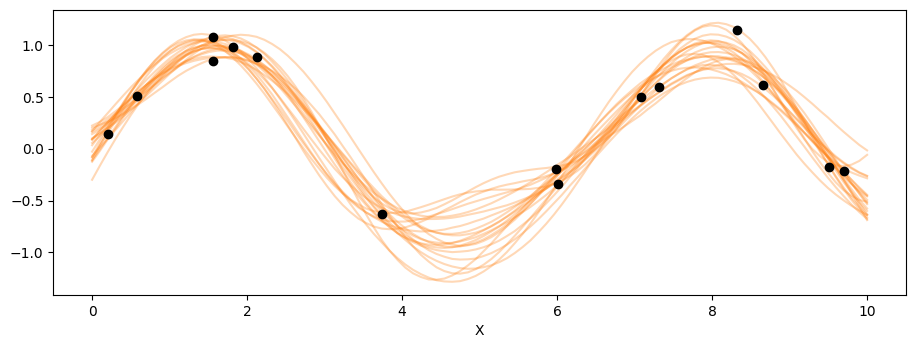

In [25]:
_, ax = plt.subplots(figsize=(11, 3.7))
ax.plot(X_new, f_pred, 'C1-', alpha=0.3)
ax.plot(X, y, 'ko')
ax.set_xlabel('X')

Text(0, 0.5, 'f(x)')

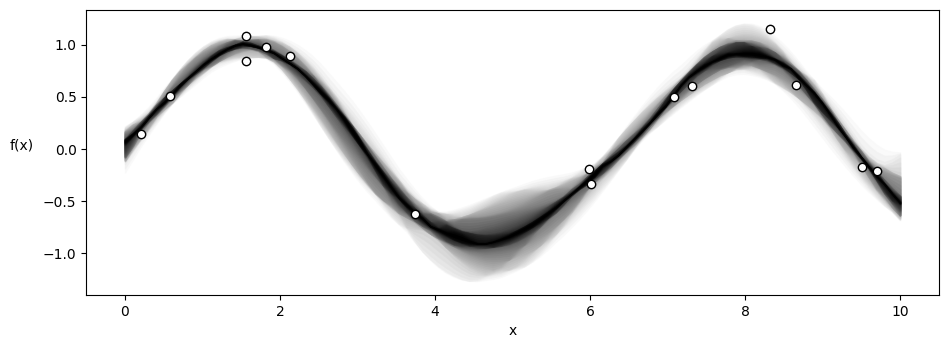

In [26]:
_, ax = plt.subplots(figsize=(11, 3.7))

pm.gp.util.plot_gp_dist(ax, f_pred.T, X_new, palette='gray_r', plot_samples=False);

ax.plot(X, y, 'wo', mec='k')
ax.set_xlabel('x')
ax.set_ylabel('f(x)', rotation=0, labelpad=15)

Text(0.5, 0, 'X')

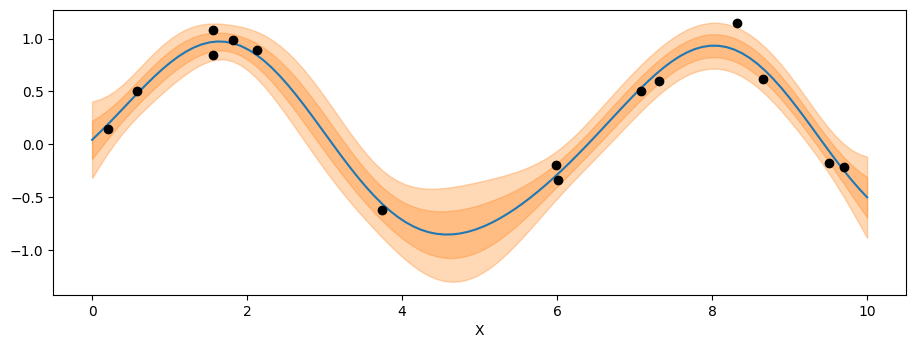

In [27]:
# plot the results
_, ax = plt.subplots(figsize=(11, 3.7))

# predict
point = {'ℓ': idata_reg.posterior['ℓ'].mean(), 'σ': idata_reg.posterior['σ'].mean()}
mu, var = gp.predict(X_new, point=point, diag=True,  model=model_reg)
sd = var**0.5

# plot mean and 1σ and 2σ intervals
ax.plot(X_new, mu, 'C0')
ax.fill_between(X_new.flatten(),
                 mu - sd, mu + sd,
                 color="C1",
                 alpha=0.3)

ax.fill_between(X_new.flatten(),
                 mu - 2*sd, mu + 2*sd,
                 color="C1",
                 alpha=0.3)

ax.plot(X, y, 'ko')
ax.set_xlabel('X')

# Time Series

In [31]:
import pandas as pd

data = {
    "Anno": [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024] * 3,
    "Classe energetica": [
        "A-B", "A-B", "A-B", "A-B", "A-B", "A-B", "A-B", "A-B", "A-B", "A-B",
        "C+", "C+", "C+", "C+", "C+", "C+", "C+", "C+", "C+", "C+",
        "C+", "C+", "C+", "C+", "C+", "C+", "C+", "C+", "C+", "C+"
    ],
    "Classe di rischio climatico": [
        "Basso rischio", "Basso rischio", "Basso rischio", "Basso rischio", "Basso rischio", "Basso rischio", "Basso rischio", "Basso rischio", "Basso rischio", "Basso rischio",
        "Basso rischio", "Basso rischio", "Basso rischio", "Basso rischio", "Basso rischio", "Basso rischio", "Basso rischio", "Basso rischio", "Basso rischio", "Basso rischio",
        "Alto rischio", "Alto rischio", "Alto rischio", "Alto rischio", "Alto rischio", "Alto rischio", "Alto rischio", "Alto rischio", "Alto rischio", "Alto rischio"
    ],
    "Prezzo al metro quadro": [
        2088, 2219, 2201, 2122, 2054, 1992, 2125, 2203, 2238, 2338,
        1465, 1774, 1690, 1886, 1882, 1870, 1739, 1923, 1750, 1958,
        1809, 1774, 1744, 1656, 1580, 1583, 1704, 1577, 1564, 1527
    ]
}

df = pd.DataFrame(data)

print(df)

    Anno Classe energetica Classe di rischio climatico  Prezzo al metro quadro
0   2015               A-B               Basso rischio                    2088
1   2016               A-B               Basso rischio                    2219
2   2017               A-B               Basso rischio                    2201
3   2018               A-B               Basso rischio                    2122
4   2019               A-B               Basso rischio                    2054
5   2020               A-B               Basso rischio                    1992
6   2021               A-B               Basso rischio                    2125
7   2022               A-B               Basso rischio                    2203
8   2023               A-B               Basso rischio                    2238
9   2024               A-B               Basso rischio                    2338
10  2015                C+               Basso rischio                    1465
11  2016                C+               Basso risch

In [34]:
microzona_data = {
    "Anno": [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024],
    "Prezzo al metro quadro microzona x": [1809, 1774, 1744, 1656, 1580, 1583, 1704, 1577, 1564, 1527]
}

microzona_df = pd.DataFrame(microzona_data)

#print(df)
print(microzona_df)


   Anno  Prezzo al metro quadro microzona x
0  2015                                1809
1  2016                                1774
2  2017                                1744
3  2018                                1656
4  2019                                1580
5  2020                                1583
6  2021                                1704
7  2022                                1577
8  2023                                1564
9  2024                                1527


In [35]:
# Merge the two datasets on "Anno"
merged_df = pd.merge(df, microzona_df, on="Anno")

print(merged_df)


    Anno Classe energetica Classe di rischio climatico  \
0   2015               A-B               Basso rischio   
1   2016               A-B               Basso rischio   
2   2017               A-B               Basso rischio   
3   2018               A-B               Basso rischio   
4   2019               A-B               Basso rischio   
5   2020               A-B               Basso rischio   
6   2021               A-B               Basso rischio   
7   2022               A-B               Basso rischio   
8   2023               A-B               Basso rischio   
9   2024               A-B               Basso rischio   
10  2015                C+               Basso rischio   
11  2016                C+               Basso rischio   
12  2017                C+               Basso rischio   
13  2018                C+               Basso rischio   
14  2019                C+               Basso rischio   
15  2020                C+               Basso rischio   
16  2021      

In [36]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [42]:
# One-hot encoding for categorical variables
encoder = OneHotEncoder()
categorical_features = merged_df[["Classe energetica", "Classe di rischio climatico"]]
categorical_encoded = encoder.fit_transform(categorical_features).toarray()

# Combine encoded categorical data with numerical data
X = pd.concat([
    pd.DataFrame(categorical_encoded),
    merged_df[["Prezzo al metro quadro microzona x"]].reset_index(drop=True)
], axis=1)
y = merged_df["Prezzo al metro quadro"]

X.columns = X.columns.astype(str)


In [43]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define Gaussian Process kernel
kernel = C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

# Train the model
gp.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=1),
                         n_restarts_optimizer=10)

In [44]:
# Predictions
y_pred = gp.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 163152.3931024123


In [45]:
y_pred

array([1637.62557435, 1810.35917841, 1620.16359339, 1941.65433107,
       1503.33454117, 1682.01501371])